# FASHION MNIST

Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes.

The 10 classes are as follows:
0 => T-shirt/top 1 => Trouser 2 => Pullover 3 => Dress 4 => Coat 5 => Sandal 6 => Shirt 7 => Sneaker 8 => Bag 9 => Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.
https://www.kaggle.com/datasets/zalando-research/fashionmnist

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
import matplotlib.pyplot as plt
%matplotlib inline

## Read the Data

In [2]:
train = pd.read_csv('fashion-mnist_train.csv')
test= pd.read_csv('fashion-mnist_test.csv')

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.shape

(60000, 785)

In [6]:
test.shape

(10000, 785)

In [7]:
train['label'].unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1], dtype=int64)

In [8]:
label_names = {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}

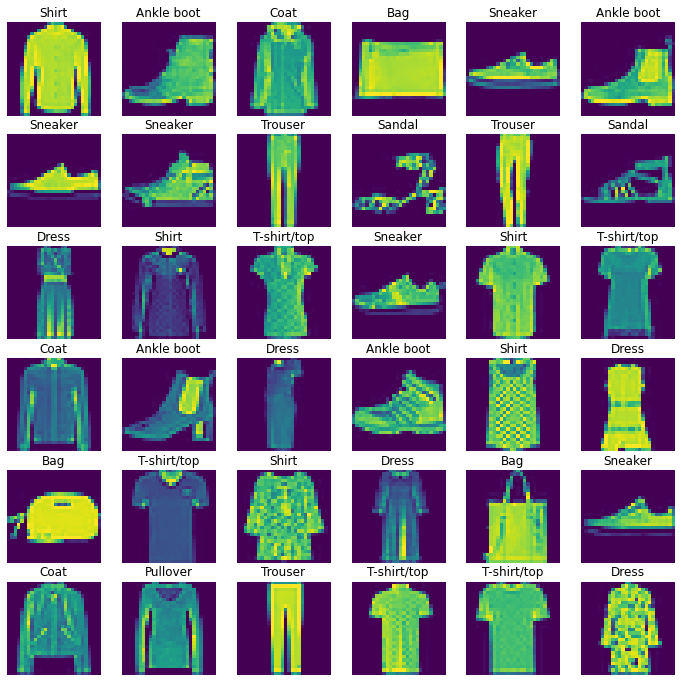

In [9]:
fig, axes = plt.subplots(6, 6, figsize = (12,12))
for row in axes:
    for axe in row:
        index = np.random.randint(60000)
        img = train.drop('label', axis=1).values[index].reshape(28,28)
        labels = train['label'][index]
        axe.imshow(img)
        axe.set_title(label_names[labels])
        axe.set_axis_off()

In [10]:
x = np.array(train.iloc[:, 1:])
y = to_categorical(np.array(train.iloc[:, 0]))

In [11]:
# split validation data to optimize classifier during training
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
#Test data
x_test = np.array(test.iloc[:, 1:])
y_test = to_categorical(np.array(test.iloc[:, 0]))

In [13]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')
x_train /= 255
x_test /= 255
x_val /= 255

## Apply Model

In [14]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [15]:
history = model.fit(x_train, y_train,batch_size=256,epochs=10,verbose=1,validation_data=(x_val, y_val))

Epoch 1/10
188/188 [==============================] - 128s 669ms/step - loss: 0.8861 - accuracy: 0.6681 - val_loss: 0.5387 - val_accuracy: 0.7977
Epoch 2/10
188/188 [==============================] - 126s 673ms/step - loss: 0.5422 - accuracy: 0.7990 - val_loss: 0.4293 - val_accuracy: 0.8342
Epoch 3/10
188/188 [==============================] - 126s 668ms/step - loss: 0.4591 - accuracy: 0.8326 - val_loss: 0.3681 - val_accuracy: 0.8663
Epoch 4/10
188/188 [==============================] - 126s 669ms/step - loss: 0.4155 - accuracy: 0.8488 - val_loss: 0.3342 - val_accuracy: 0.8788
Epoch 5/10
188/188 [==============================] - 129s 685ms/step - loss: 0.3798 - accuracy: 0.8616 - val_loss: 0.3112 - val_accuracy: 0.8882
Epoch 6/10
188/188 [==============================] - 129s 685ms/step - loss: 0.3617 - accuracy: 0.8692 - val_loss: 0.3031 - val_accuracy: 0.8898
Epoch 7/10
188/188 [==============================] - 129s 684ms/step - loss: 0.3436 - accuracy: 0.8742 - val_loss: 0.2894 -

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)

In [17]:
print('Test accuracy:', score[1])

Test accuracy: 0.9067999720573425


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         7

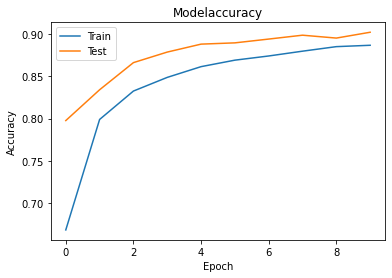

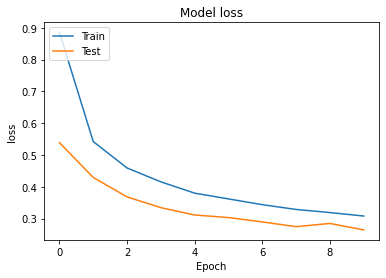

In [19]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Modelaccuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="upper left")
plt.show()